# Portland Crime 

## Import pachages and load clean data

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = os.path.join("Unsolved/Resources", "crime_incident_data2017.csv")

In [5]:
df =pd.read_csv(path)

In [6]:
df = pd.read_csv(path)\
     .rename(columns= lambda s: s.lower().replace(' ', '_'))\
    [["neighborhood",
    'occur_date',
    'occur_time',
    'offense_category',
    'offense_count',
    'offense_type',
    'report_date'
   ]]\
    .dropna()\
    .assign(report_date=lambda df: pd.to_datetime(df['report_date'], format="%m/%d/%y") )

occur_datetime = pd.to_datetime(
    df["occur_date"] +":"+ df['occur_time'].astype("str").apply(lambda s: s[:-2]+ ":" +s[-2:]),
                                                                format="%m/%d/%y:%H:%M",
                                                                errors="coerce"
                                                               )

df = df.assign(occur_datetime=occur_datetime)\
    .drop("occur_date", axis = 1)\
    .drop("occur_time", axis = 1)\
    .dropna()

In [7]:
# Bu kisimda listeden bir columns dusmek istersen drop methodunu kullanmak gerekiyor. 

In [8]:
df


,neighborhood,offense_category,offense_count,offense_type,report_date,occur_datetime
1,Centennial,Fraud Offenses,1,Identity Theft,2017-01-20,2000-01-20 16:15:00
2,Montavilla,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,2017-01-09,2003-12-01 08:00:00
5,King,Fraud Offenses,1,Identity Theft,2017-01-03,2010-11-28 16:12:00
6,Vernon,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,2017-01-26,2013-11-08 12:00:00
7,Vernon,Fraud Offenses,1,Identity Theft,2017-01-26,2013-11-08 12:00:00
...,...,...,...,...,...,...
41026,Parkrose,Drug/Narcotic Offenses,1,Drug/Narcotic Violations,2017-08-31,2017-08-31 20:05:00
41027,Sumner,Drug/Narcotic Offenses,1,Drug/Narcotic Violations,2017-08-31,2017-08-31 05:35:00
41028,Hazelwood,Prostitution Offenses,1,Prostitution,2017-08-31,2017-08-31 16:19:00
41029,Hazelwood,Prostitution Offenses,1,Prostitution,2017-08-31,2017-08-31 19:59:00


In [9]:

occur_datetime = pd.to_datetime(df["occur_date"] +":"+ df['occur_time'].astype("str").apply(lambda s: s[:-2]+ ":" +s[-2:],format="%m/%d/%y:%H:%M",errors="coerce")

df = df.assign(occur_datetime=occur_datetime)

SyntaxError: invalid syntax (<ipython-input-9-dea36c09416e>, line 3)

In [ ]:
df.head()

## Drop columns first then drop rows

# if I go with DROPNA(inpalce) it will do motation to your df file. becareful. 

# Now we want to change the column names:  df['address'] bu bir Sreies olusturuyor df[['address']] bu ise bir dataframe olusturuyor.

In [ ]:
df[df['offense_count'] >= 2 ]["offense_count"]  # Buna mask deniliyor. data da 2 ve yukarinisi offense_count icin siraladi. 

# Apply method pandas methodlari hatirlanmadigi durumlarda "lambda" function ile apply edilerek kullanilabilir. 

In [ ]:

df.dtypes

## Analysis 

In [ ]:
df.head()

1. oldest values

2. Time to Report

3.a Most Crime Hour (by num row)

## 3. Most Crime Hours (by offense_count)

## 4. Most Crime Neighborhood (by incedent)

In [ ]:
neighborhood_crime_count = df['neighborhood'].value_counts()

In [ ]:
neighborhood_crime_count.head(10).sort_values(ascending=True)

In [ ]:
neighborhood_crime_count.tail(10)

In [ ]:
neighborhood_crime_count.tail(10).sort_values(ascending=True)

## Most Crime Neighborhoods (offense_count)

In [ ]:
vehicle_df = df[df['offense_type'] == "Theft of Motor Vehicle Parts or Accessories"]

In [ ]:
vehicle_df['neighborhood'].value_counts()

In [ ]:
df.groupby('neighborhood')["offense_count"].sum().sort_values()

In [ ]:
df['neighborhood'].value_counts().tail()

5. Most common Crime

In [ ]:
df.dtypes

In [ ]:
df

In [15]:
df.groupby(pd.Grouper(key= 'occur_datetime', freq='1B'))["offense_count"].sum().sort_values(ascending=False)

occur_datetime
2017-04-28    511
2017-05-19    507
2017-05-26    493
2017-04-21    486
2017-07-21    486
             ... 
2003-12-29      0
2003-12-26      0
2003-12-25      0
2003-12-24      0
1998-09-08      0
Name: offense_count, Length: 9905, dtype: int64

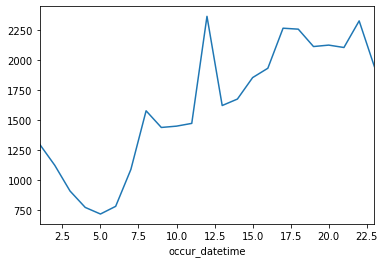

In [26]:
df.groupby(df['occur_datetime'].dt.hour)["offense_count"].sum().plot(kind="line")
